## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv(r'C:\Users\omdes\Desktop\data\Dataset-main\HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],inplace=True)

In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## Data Visualization

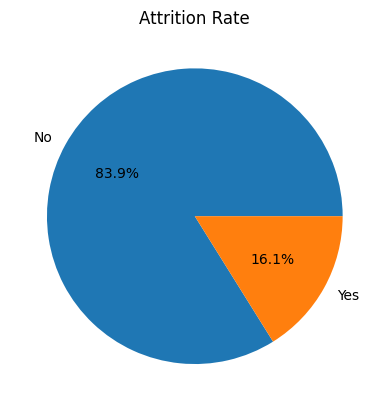

In [11]:
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Attrition Rate")
plt.ylabel("")
plt.show()

In [12]:
sort=df['JobRole'].value_counts().index

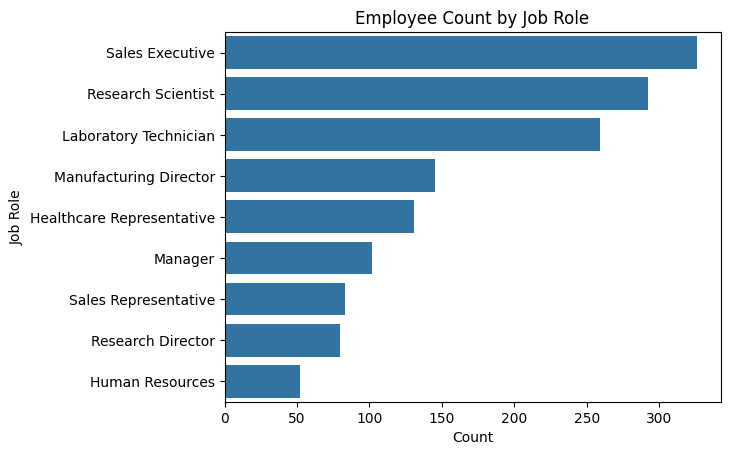

In [13]:
sns.countplot(y='JobRole', data=df, order=sort)
plt.title("Employee Count by Job Role")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

In [14]:
sort=df['EducationField'].value_counts().index

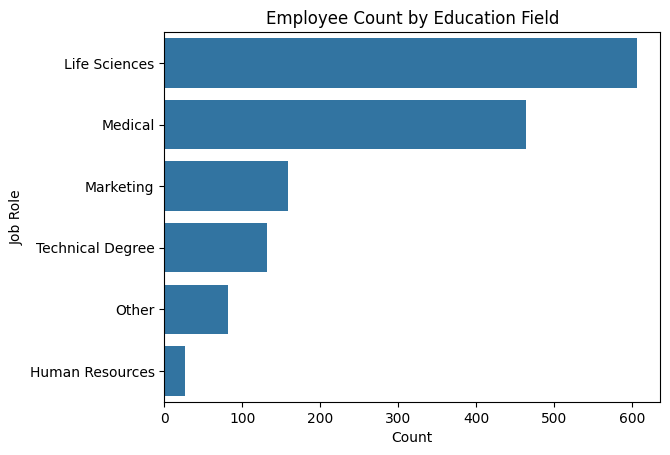

In [15]:
sns.countplot(y='EducationField', data=df, order=sort)
plt.title("Employee Count by Education Field")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

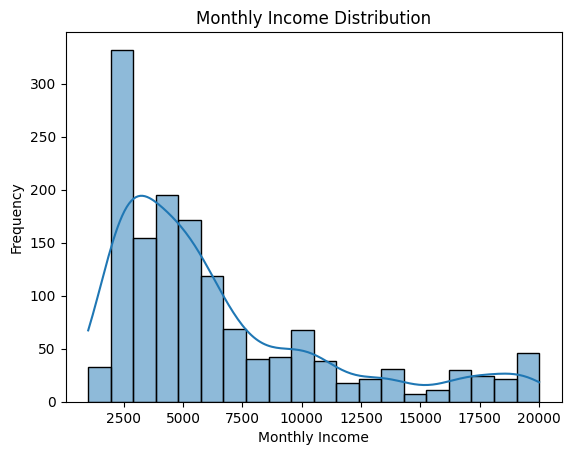

In [16]:
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()

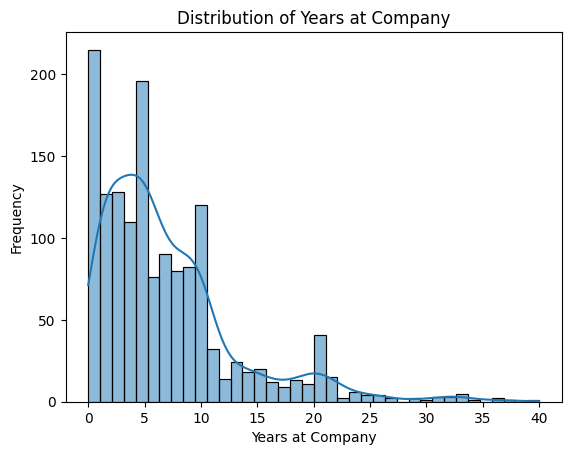

In [17]:
sns.histplot(df['YearsAtCompany'], kde=True)
plt.title("Distribution of Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Frequency")
plt.show()

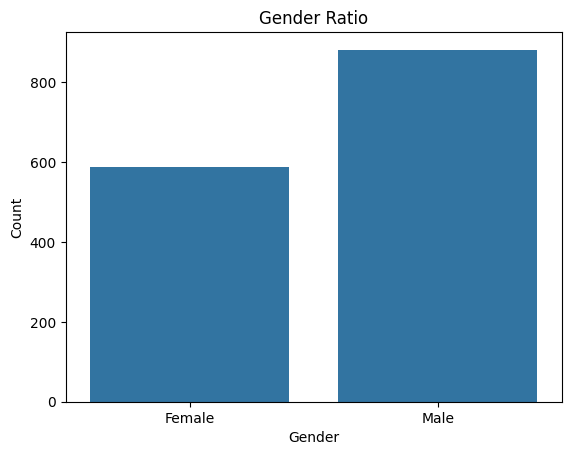

In [18]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

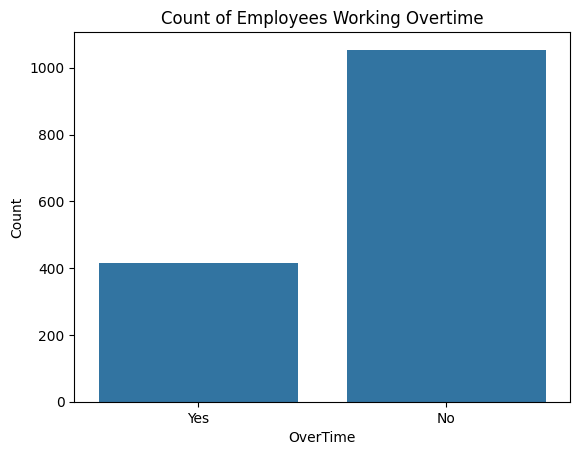

In [19]:
sns.countplot(x='OverTime', data=df)
plt.title("Count of Employees Working Overtime")
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.show()

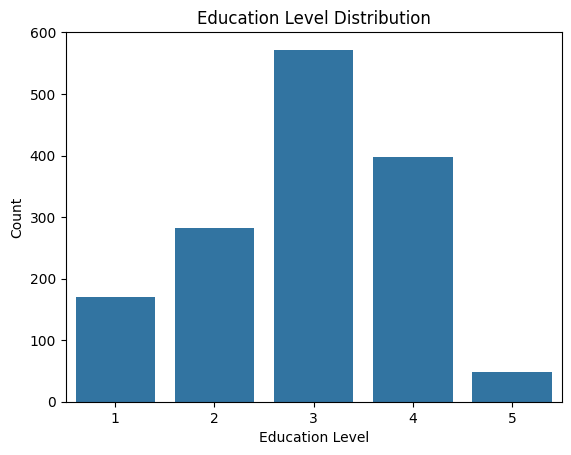

In [20]:
sns.countplot(x='Education', data=df)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

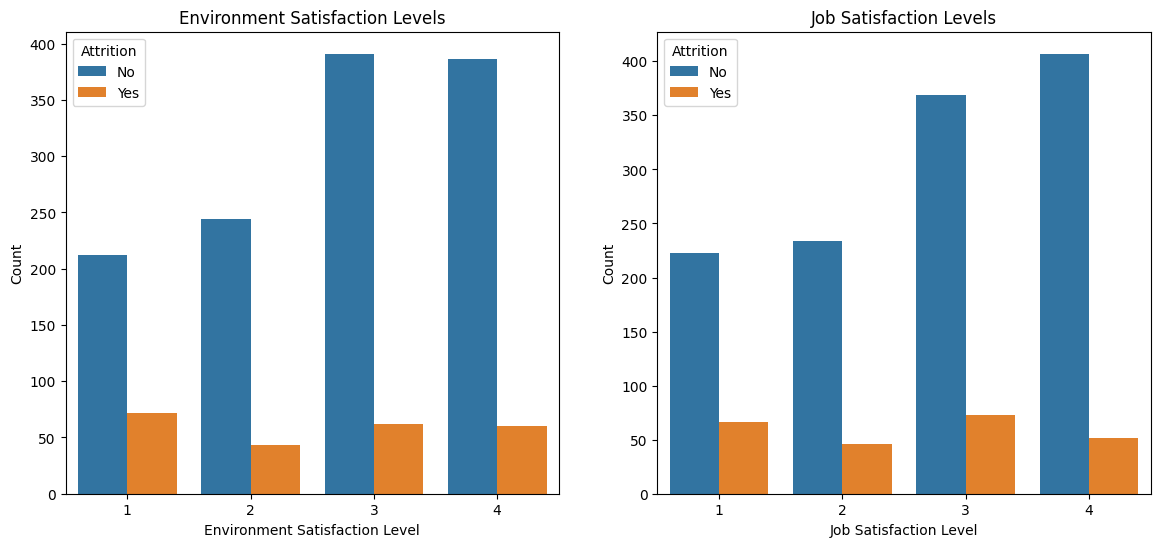

In [21]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition' ,data=df)
plt.title("Environment Satisfaction Levels")
plt.xlabel("Environment Satisfaction Level")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x='JobSatisfaction',hue='Attrition' ,data=df)
plt.title("Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Count")


plt.show()

### 

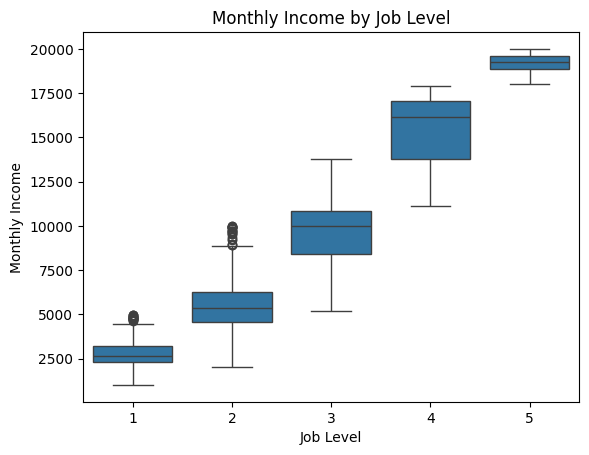

In [22]:
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.show()

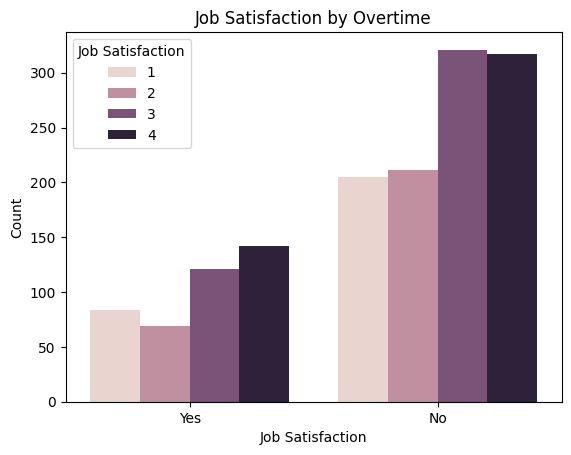

In [23]:
sns.countplot(hue='JobSatisfaction', x='OverTime', data=df)
plt.title("Job Satisfaction by Overtime")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.legend(title="Job Satisfaction")
plt.show()

In [24]:
attrition_percentage_by_department = (df[df['Attrition'] == 'Yes'].groupby('Department').size() / df.groupby('Department').size()) * 100
attrition_count_by_department = df[df['Attrition'] == 'Yes'].groupby('Department').size()

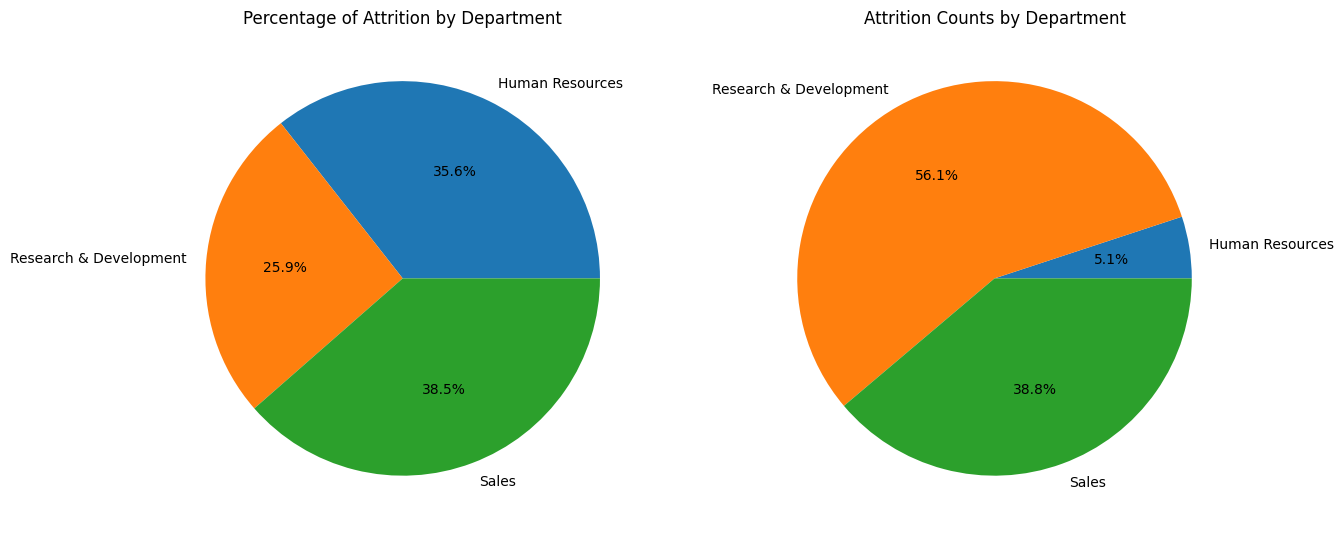

In [25]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(attrition_percentage_by_department, labels=attrition_percentage_by_department.index, autopct='%1.1f%%')
plt.title("Percentage of Attrition by Department")

plt.subplot(1, 2, 2)
plt.pie(attrition_count_by_department, labels=attrition_count_by_department.index, autopct='%1.1f%%')
plt.title("Attrition Counts by Department")


plt.show()

In [26]:
attrition_by_education = df[df['Attrition'] == 'Yes']['Education'].value_counts()

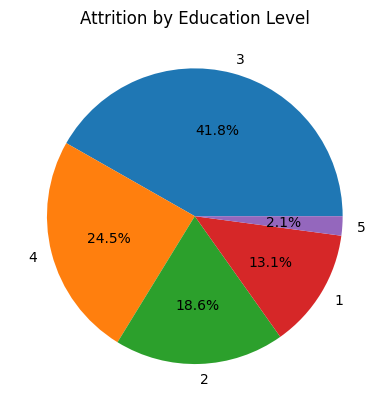

In [27]:
plt.pie(attrition_by_education, labels=attrition_by_education.index, autopct='%1.1f%%')
plt.title("Attrition by Education Level")
plt.show()

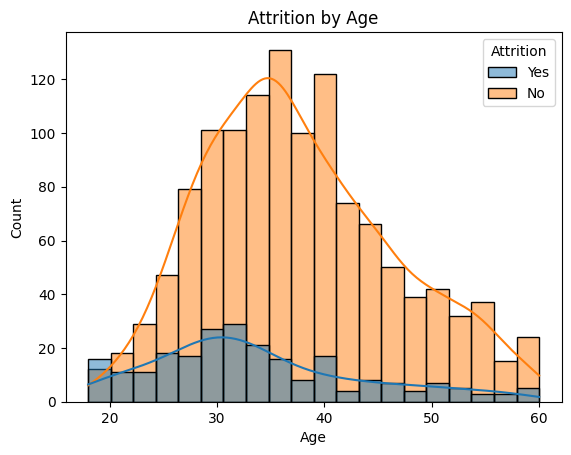

In [28]:
sns.histplot(x='Age', hue='Attrition',bins=20,kde=True,data=df)
plt.title("Attrition by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

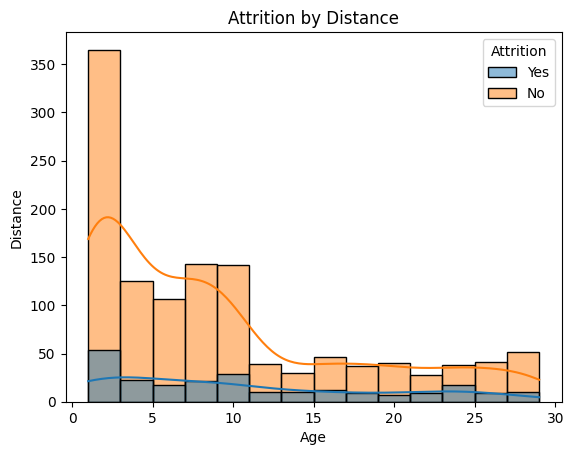

In [29]:
sns.histplot(x='DistanceFromHome',hue='Attrition',kde=True,data=df)
plt.title("Attrition by Distance")
plt.xlabel("Age")
plt.ylabel("Distance")
plt.show()

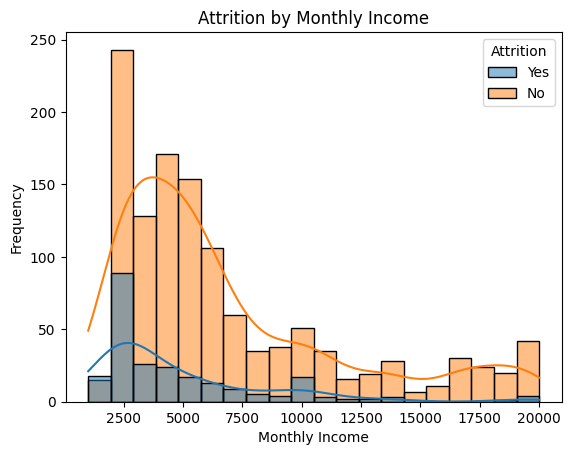

In [30]:
sns.histplot(x='MonthlyIncome',hue='Attrition', kde=True ,data=df)
plt.title("Attrition by Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()

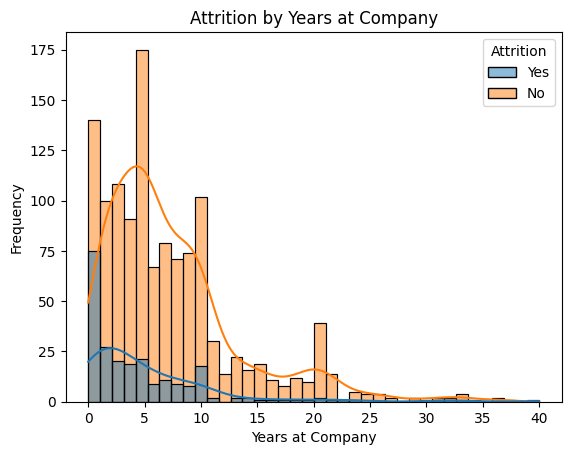

In [31]:
sns.histplot(x='YearsAtCompany', hue='Attrition',kde=True ,data=df)
plt.title("Attrition by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Frequency")
plt.show()

### 

In [32]:
attrition_rate_by_years = df.groupby('YearsAtCompany')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100

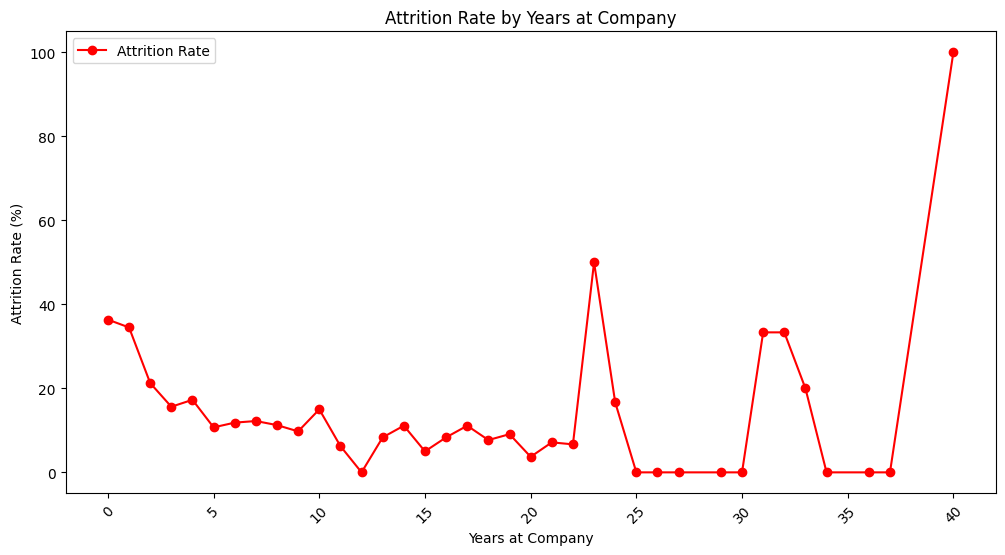

In [33]:
plt.figure(figsize=(12, 6))
attrition_rate_by_years['Yes'].plot(kind='line', marker='o', color='red', label='Attrition Rate')
plt.title("Attrition Rate by Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [34]:
age_income_attrition = df.groupby(['Age', 'Attrition'])['MonthlyIncome'].mean().reset_index()

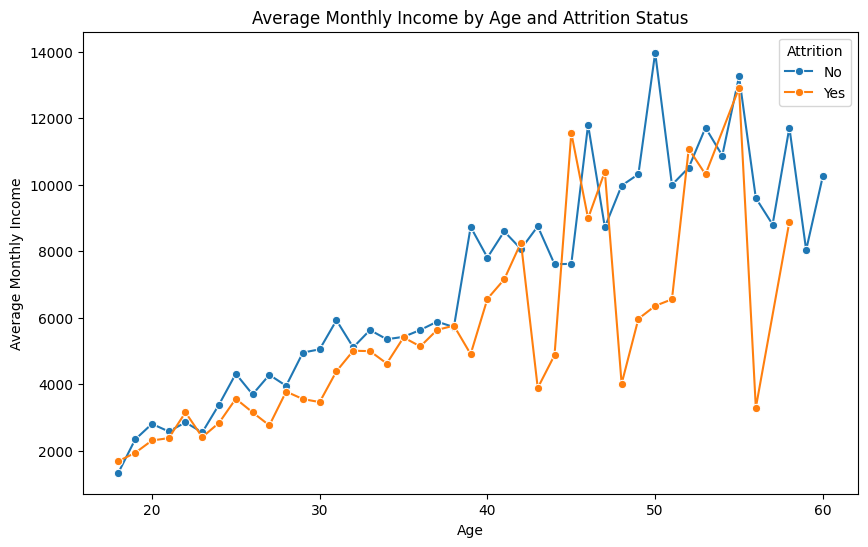

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='MonthlyIncome', hue='Attrition', data=age_income_attrition, marker="o")
plt.title("Average Monthly Income by Age and Attrition Status")
plt.xlabel("Age")
plt.ylabel("Average Monthly Income")
plt.show()

## Encoding and Feature Engineering

In [11]:
col_to_encode=df.select_dtypes(include='object').columns

In [12]:
le=LabelEncoder()
for i in col_to_encode:
    df[i]=le.fit_transform(df[i])

In [13]:
clo_to_plot=df.columns

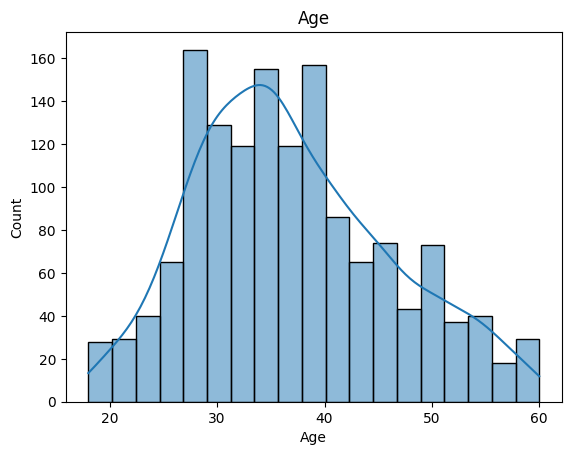

Age


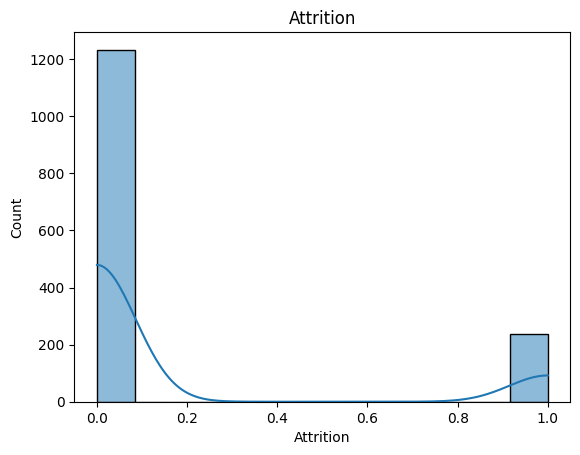

Attrition


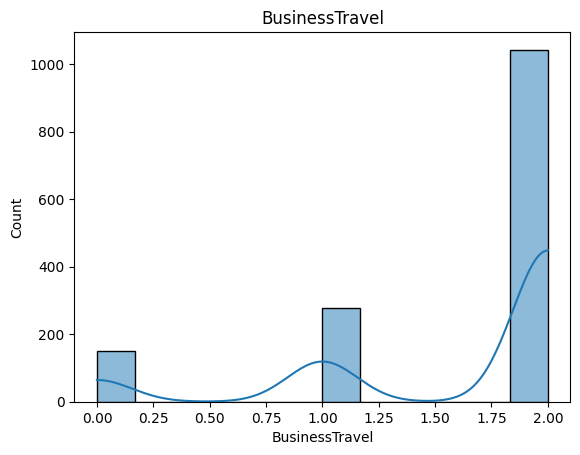

BusinessTravel


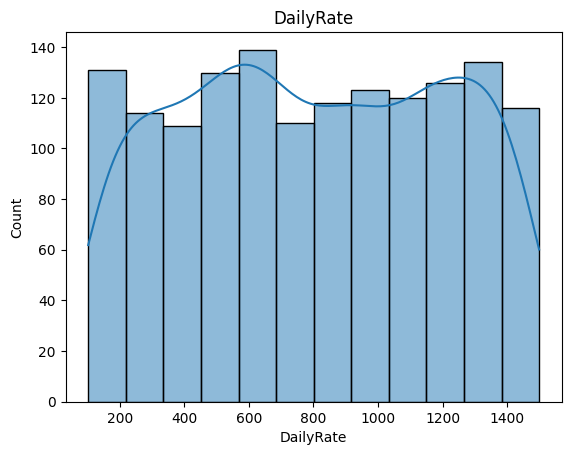

DailyRate


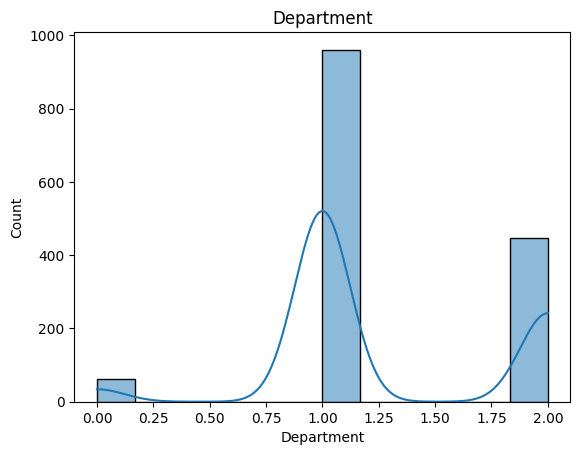

Department


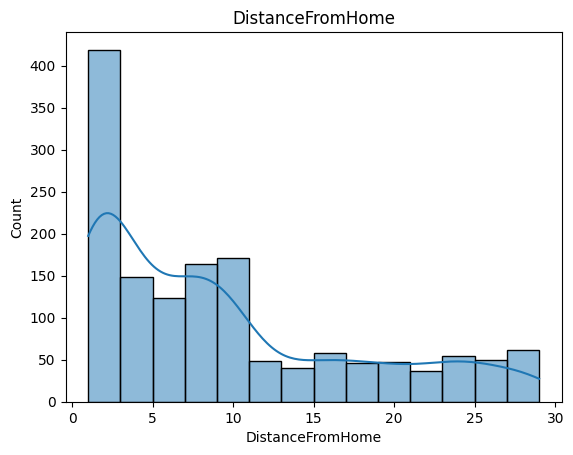

DistanceFromHome


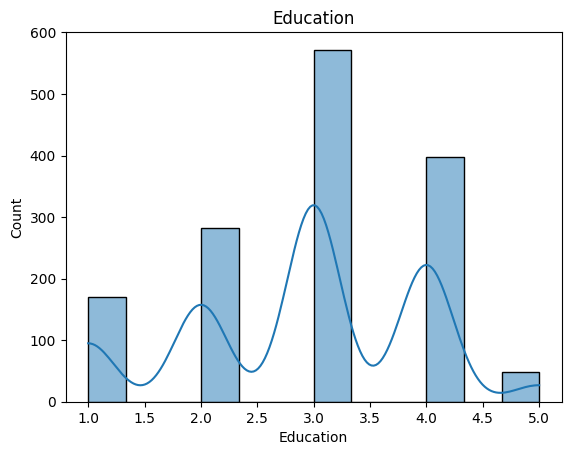

Education


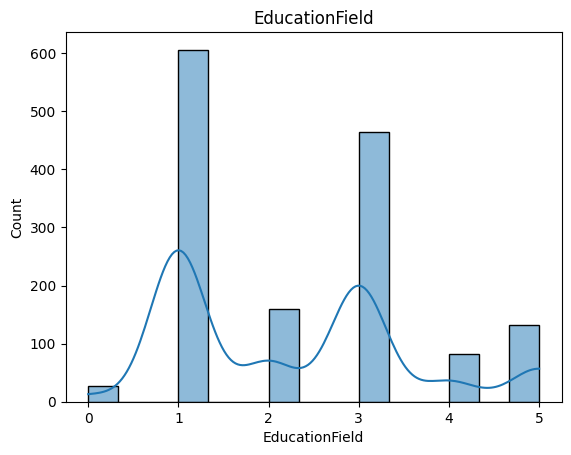

EducationField


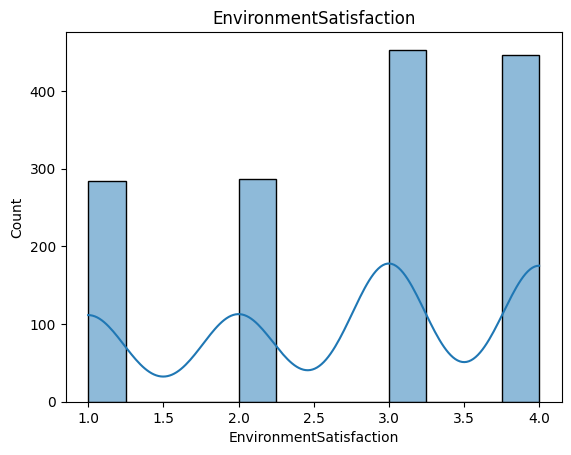

EnvironmentSatisfaction


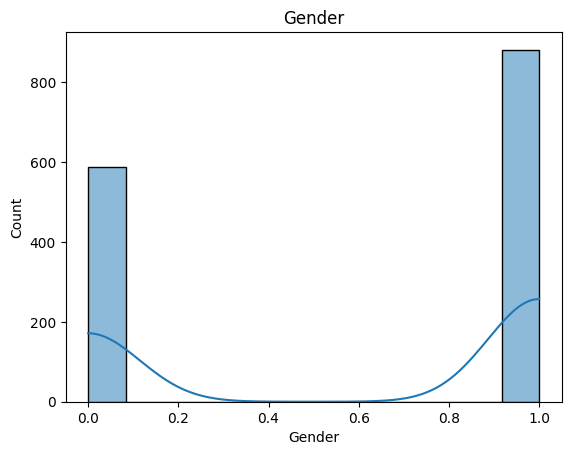

Gender


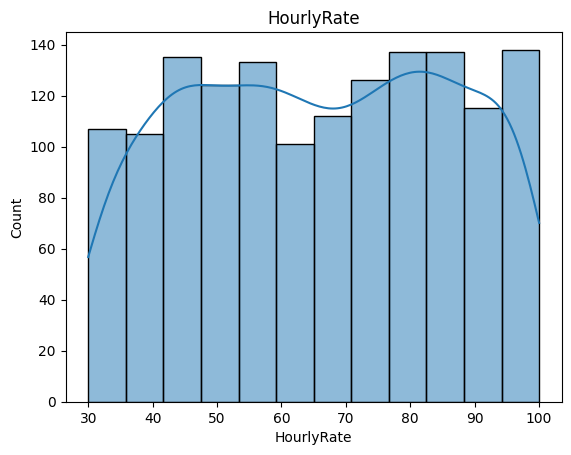

HourlyRate


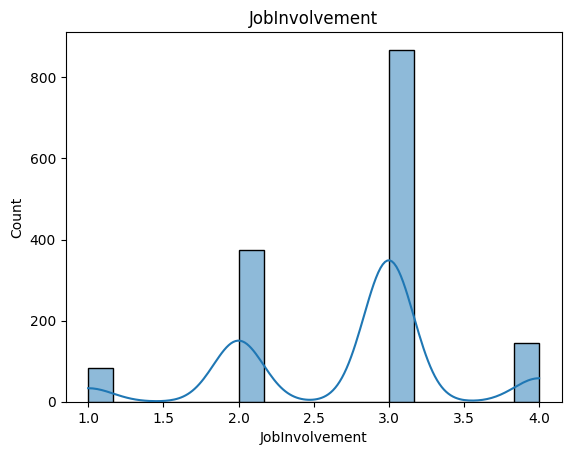

JobInvolvement


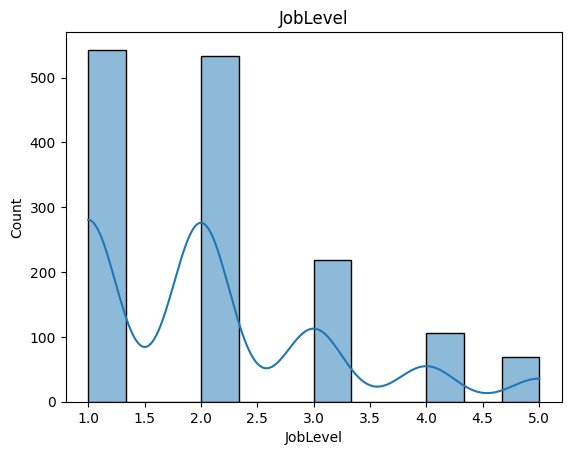

JobLevel


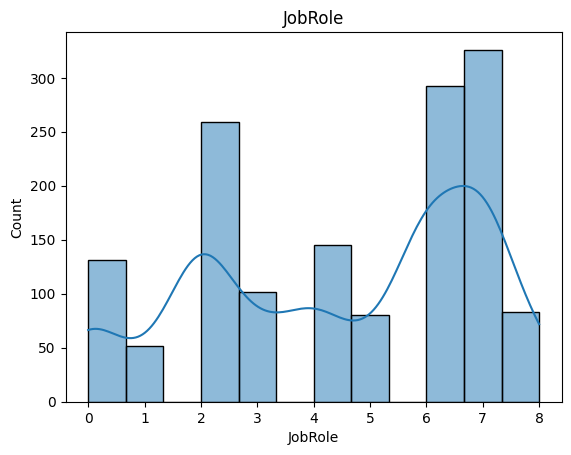

JobRole


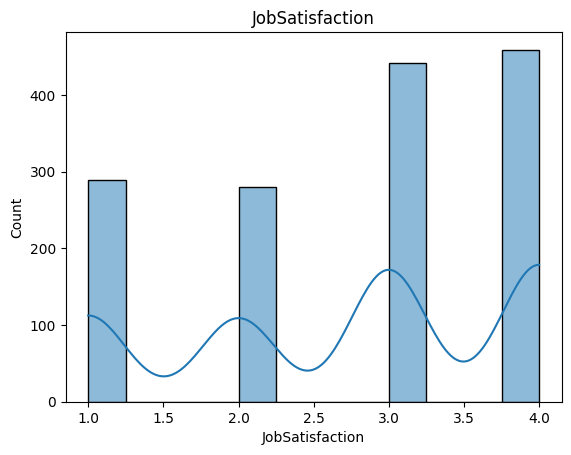

JobSatisfaction


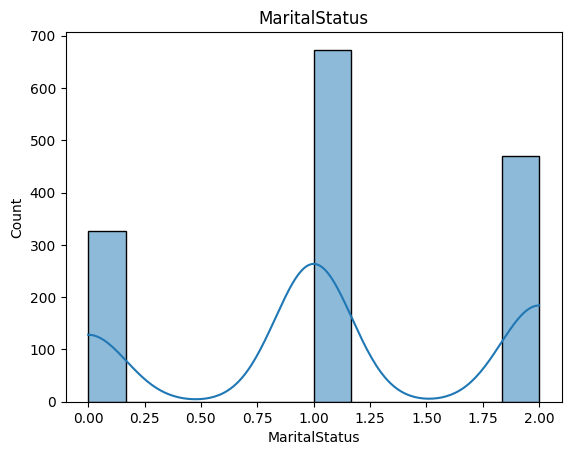

MaritalStatus


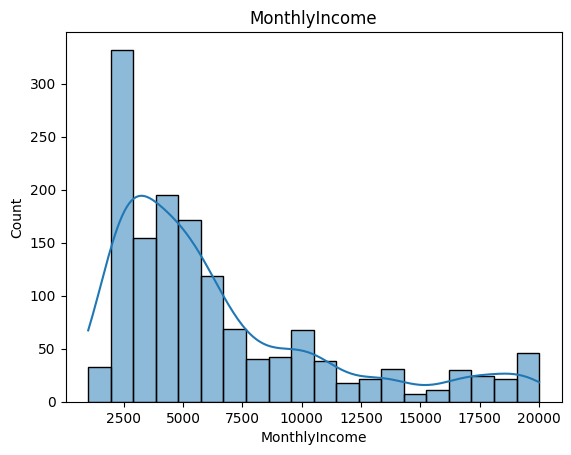

MonthlyIncome


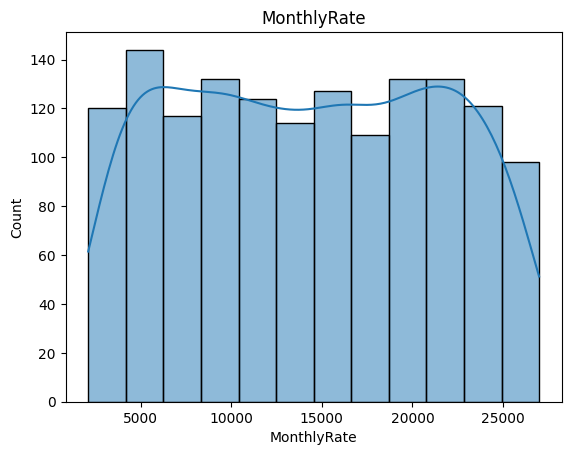

MonthlyRate


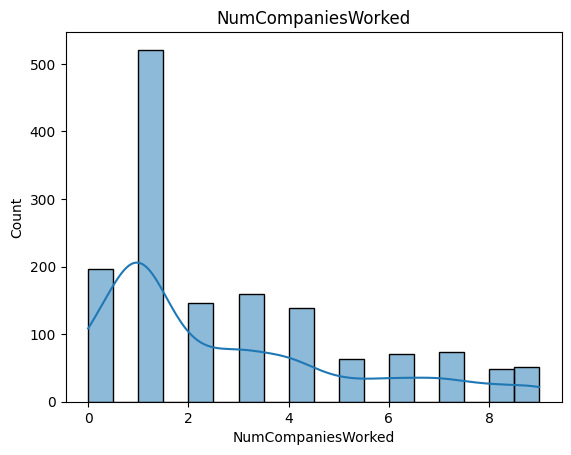

NumCompaniesWorked


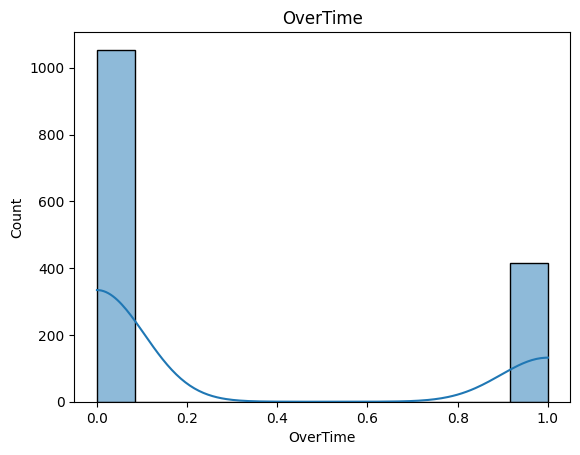

OverTime


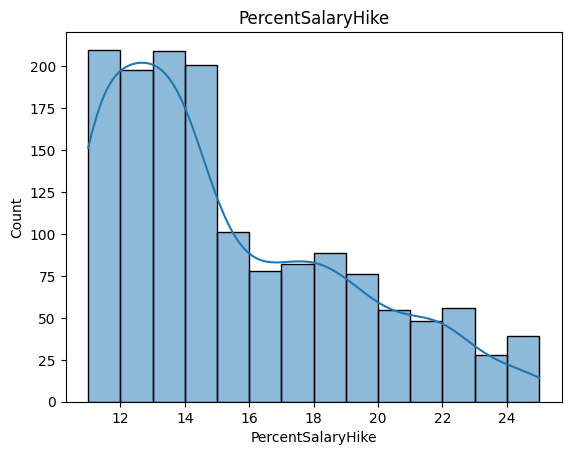

PercentSalaryHike


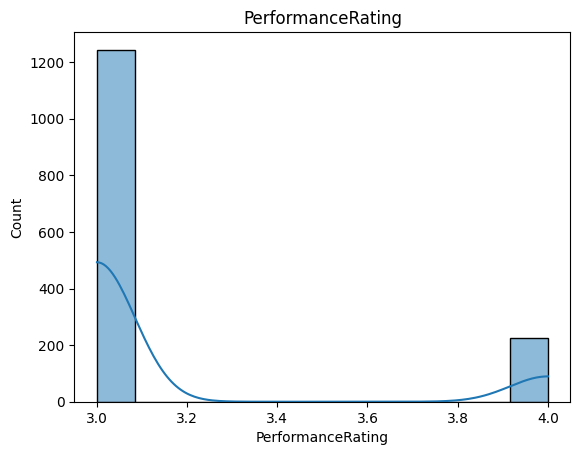

PerformanceRating


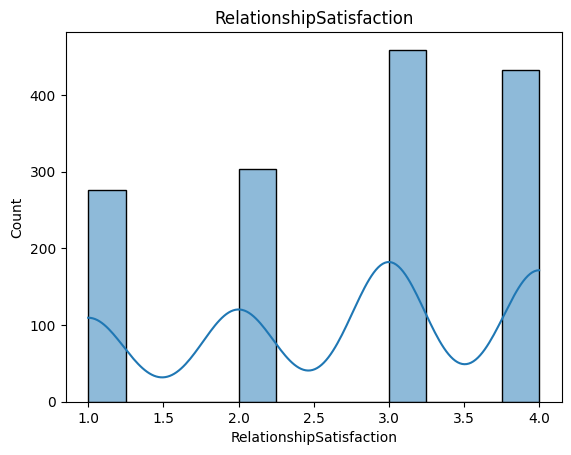

RelationshipSatisfaction


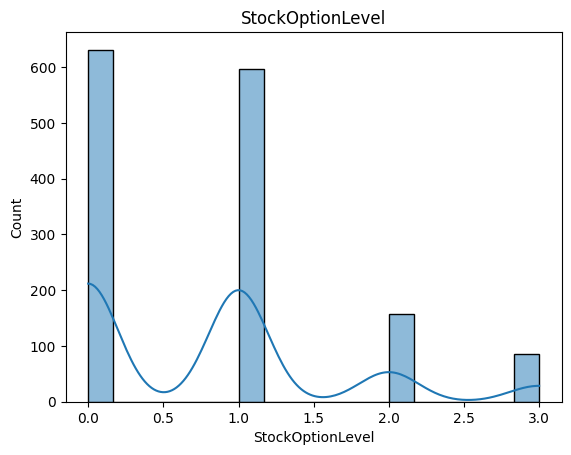

StockOptionLevel


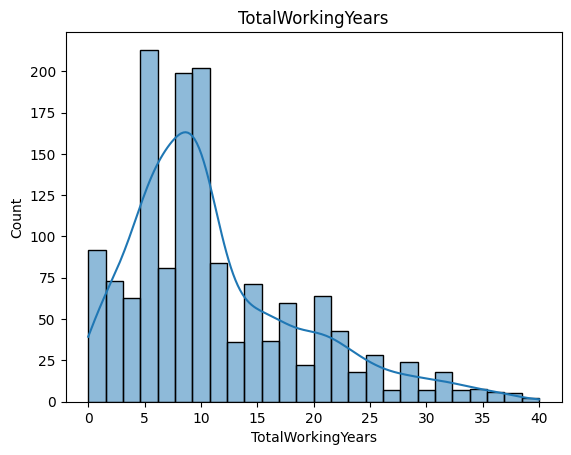

TotalWorkingYears


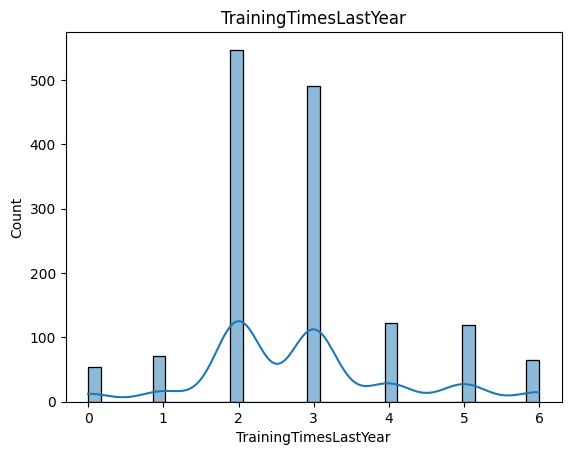

TrainingTimesLastYear


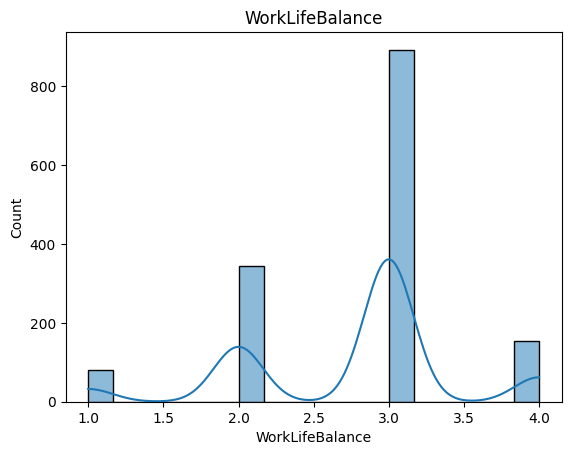

WorkLifeBalance


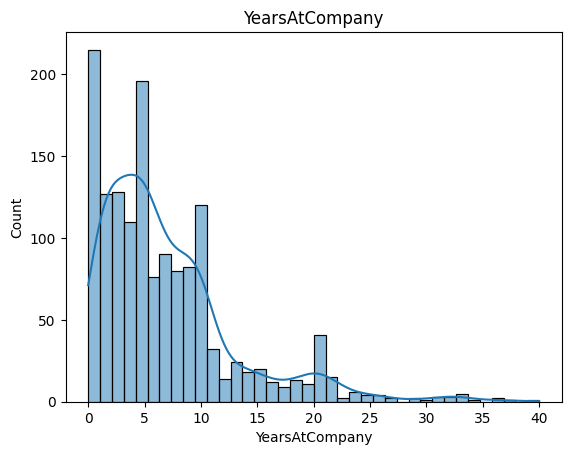

YearsAtCompany


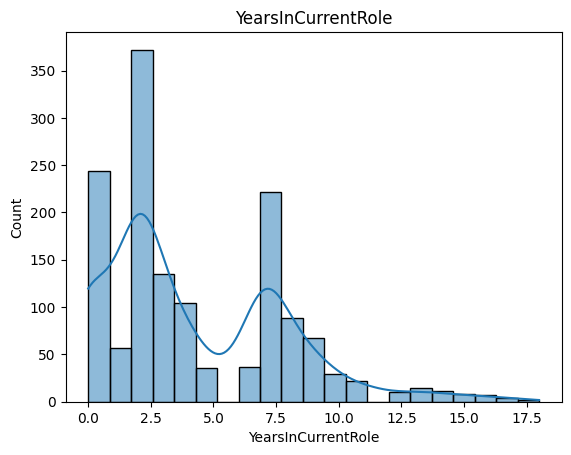

YearsInCurrentRole


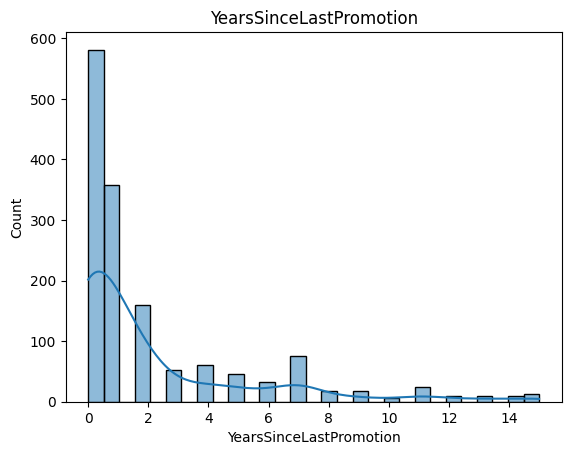

YearsSinceLastPromotion


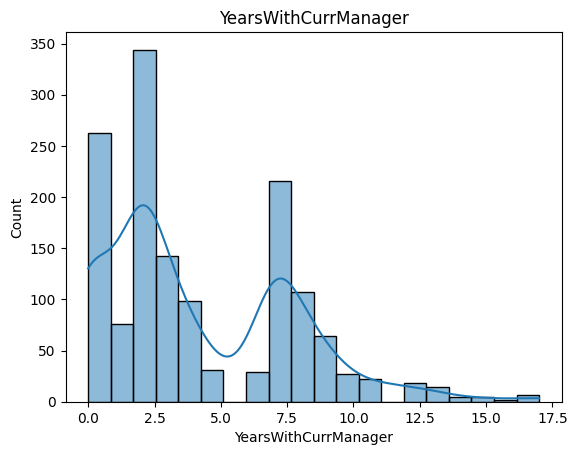

YearsWithCurrManager


In [14]:
for i in clo_to_plot:
    sns.histplot(x=i,data=df,kde=True)
    plt.title(i)
    plt.show()
    print(i)

In [15]:
right_skewed =['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [16]:
ft=FunctionTransformer(func=np.log1p)

In [17]:
for i in right_skewed:
    df[i]=ft.fit_transform(df[[i]])

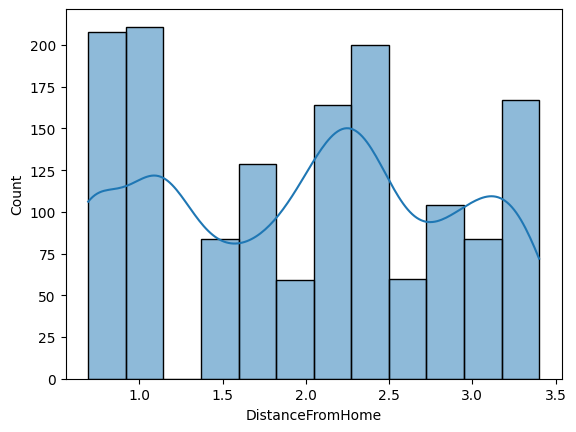

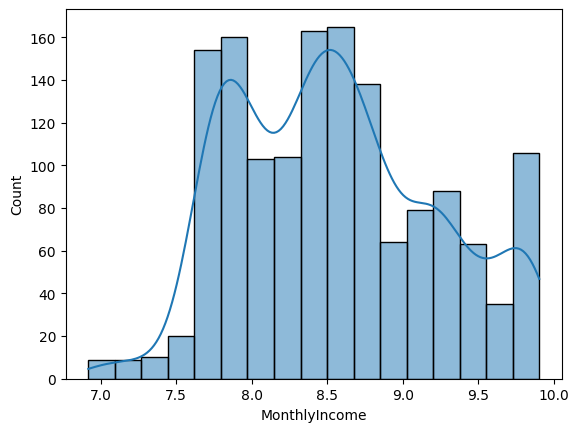

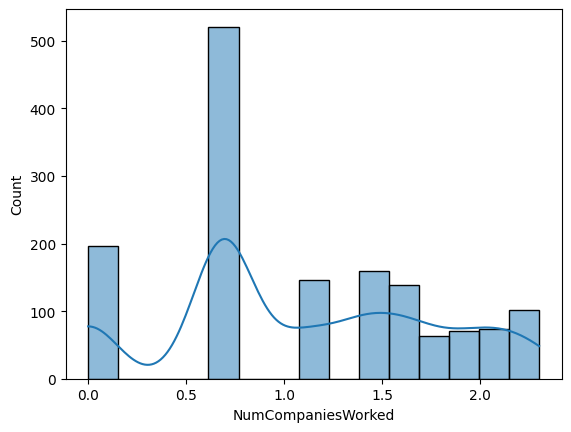

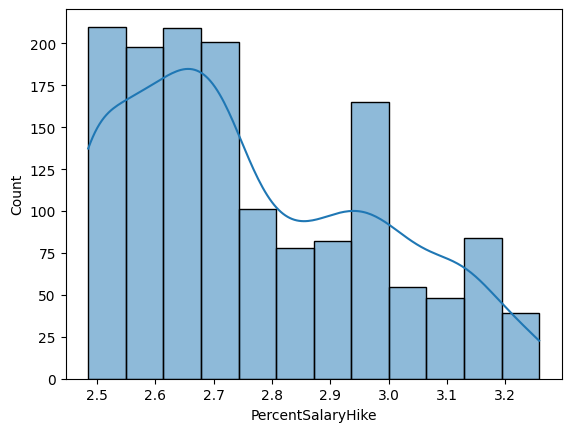

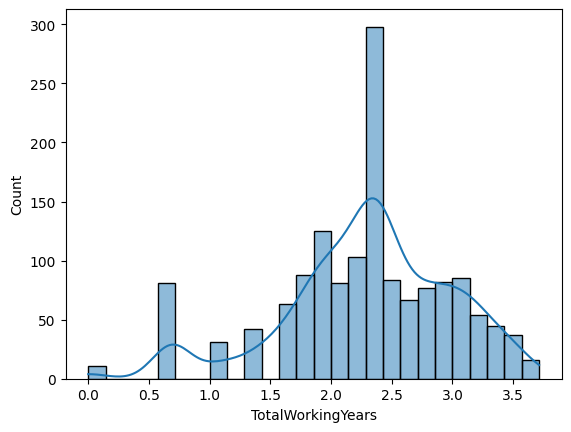

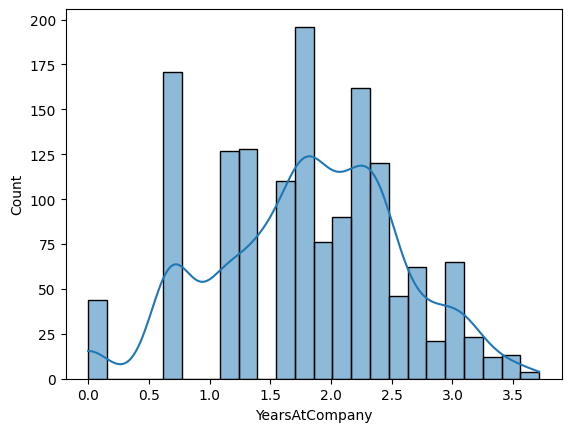

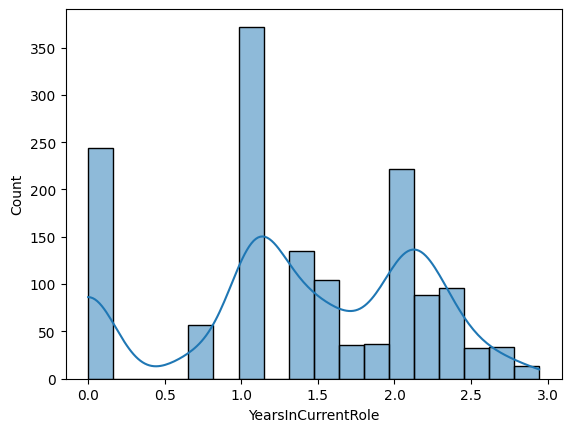

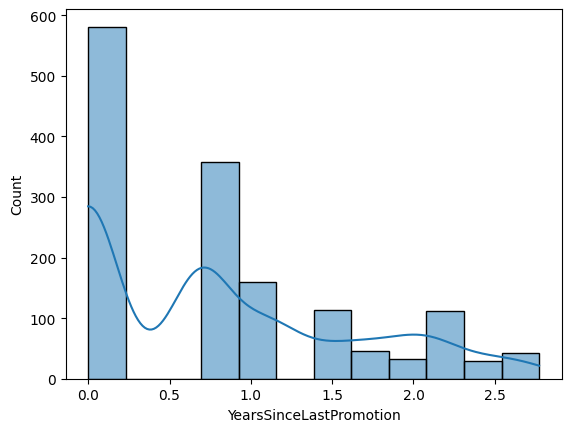

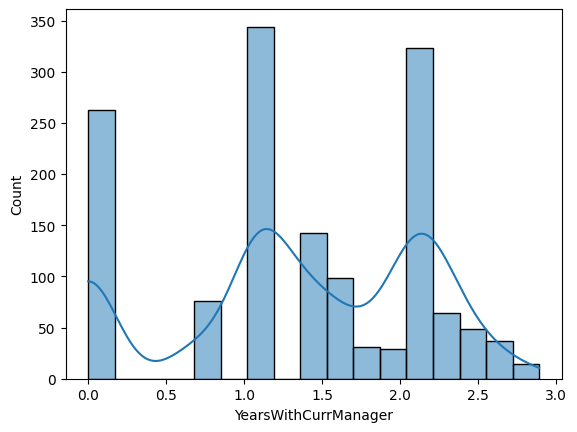

In [18]:
for i in right_skewed:
    sns.histplot(df[i],kde=True)
    plt.show()

## Model Building

###  on Imbalanced Data

In [19]:
x=df.drop(columns=['Attrition'])
y=df['Attrition']

In [19]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]

In [20]:
for i in models:
    y_pred = cross_val_predict(estimator=i, X=x, y=y, cv=StratifiedKFold(5))
    score=cross_val_score(estimator=i,X=x,y=y,cv=StratifiedKFold(5))
    print(i)
    print()
    print('mean',score.mean())
    print('_ _ _'*5)
    print('Confusion Matrix:\n', confusion_matrix(y, y_pred))
    print('Classification Report:\n', classification_report(y, y_pred))
    print('_ _ _'*20)

LogisticRegression()

mean 0.8530612244897959
_ _ __ _ __ _ __ _ __ _ _
Confusion Matrix:
 [[1221   12]
 [ 204   33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.73      0.14      0.23       237

    accuracy                           0.85      1470
   macro avg       0.80      0.56      0.58      1470
weighted avg       0.84      0.85      0.81      1470

_ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ __ _ _
DecisionTreeClassifier()

mean 0.7863945578231293
_ _ __ _ __ _ __ _ __ _ _
Confusion Matrix:
 [[1063  170]
 [ 141   96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1233
           1       0.36      0.41      0.38       237

    accuracy                           0.79      1470
   macro avg       0.62      0.63      0.63      1470
weighted avg

### on Balanced Data

####  Used SMOTE(Synthetic Minority Oversampling Technique ) to balance the data

In [20]:
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [22]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]

In [23]:
for i in models:
    y_pred = cross_val_predict(estimator=i, X=x, y=y, cv=StratifiedKFold(5))
    score=cross_val_score(estimator=i,X=x,y=y,cv=StratifiedKFold(5))
    print(i)
    print()
    print('mean',score.mean())
    print('_ _ _ '*5)
    print(confusion_matrix(y, y_pred))
    print('_ _ _ '*5)
    print( classification_report(y, y_pred))
    print('_ _ _ '*20)

LogisticRegression()

mean 0.7847213211684227
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
[[989 244]
 [287 946]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1233
           1       0.79      0.77      0.78      1233

    accuracy                           0.78      2466
   macro avg       0.79      0.78      0.78      2466
weighted avg       0.79      0.78      0.78      2466

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
DecisionTreeClassifier()

mean 0.8021647190217702
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
[[967 266]
 [239 994]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1233
           1       0.79      0.81      0.80      1233

    accuracy                           0.80      2466
   macro avg       0.80      0.80      0.80      2466
weighted avg  

### choosing the top 3 models and applying GridSearchCV

#### RandomForestClassifier

In [24]:
RFgrid = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[6,8,10,12],
    'min_samples_split':[3,4,5,6],
    'max_features':[6,8,10],
    'max_samples':[500,550,600,650]
}

In [25]:
RFgscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=RFgrid,cv=StratifiedKFold(5),n_jobs=-1)

In [26]:
RFgscv.fit(X=x,y=y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 8, 10, 12],
                         'max_features': [6, 8, 10],
                         'max_samples': [500, 550, 600, 650],
                         'min_samples_split': [3, 4, 5, 6]})

In [27]:
RFgscv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 6,
 'max_samples': 650,
 'min_samples_split': 3}

In [28]:
RFgscv.best_score_

0.8853199858751262

In [29]:
best_rfc_model = RFgscv.best_estimator_

In [30]:
y_pred = cross_val_predict(estimator=best_rfc_model, X=x, y=y, cv=StratifiedKFold(5))

In [31]:
score = cross_val_score(estimator=best_rfc_model, X=x, y=y, cv=StratifiedKFold(5))

In [32]:
print(score.mean())
print('_ _ _ ' * 5)
print('Confusion Matrix:\n', confusion_matrix(y, y_pred))
print('_ _ _ ' * 5)
print('Classification Report:\n', classification_report(y, y_pred))

0.8788315773049412
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Confusion Matrix:
 [[1131  102]
 [ 191 1042]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1233
           1       0.91      0.85      0.88      1233

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



#### KNeighborsClassifier

In [33]:
KNCgrid = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [20, 30, 40, 50],  
    'metric': ['euclidean', 'manhattan', 'chebyshev']  
}

In [34]:
KNCgscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=KNCgrid,cv=StratifiedKFold(5),n_jobs=-1)

In [35]:
KNCgscv.fit(X=x,y=y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [36]:
KNCgscv.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 3,
 'weights': 'distance'}

In [37]:
KNCgscv.best_score_

0.7672237232181718

In [38]:
best_knn_model = KNCgscv.best_estimator_

In [39]:
y_pred = cross_val_predict(estimator=best_knn_model, X=x, y=y, cv=StratifiedKFold(5))

In [40]:
score = cross_val_score(estimator=best_knn_model, X=x, y=y, cv=StratifiedKFold(5))

In [41]:
print(score.mean())
print('_ _ _ ' * 5)
print('Confusion Matrix:\n', confusion_matrix(y, y_pred))
print('_ _ _ ' * 5)
print('Classification Report:\n', classification_report(y, y_pred))

0.7672237232181718
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Confusion Matrix:
 [[ 797  436]
 [ 138 1095]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.74      1233
           1       0.72      0.89      0.79      1233

    accuracy                           0.77      2466
   macro avg       0.78      0.77      0.76      2466
weighted avg       0.78      0.77      0.76      2466



#### DecisionTreeClassifier

In [42]:
DTCgrid = {
    'criterion': ['gini', 'entropy','log_loss'], 
    'max_depth': [6,8,10,12],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [43]:
DTCgscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=DTCgrid,cv=StratifiedKFold(5),n_jobs=-1)

In [44]:
DTCgscv.fit(X=x,y=y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10]})

In [45]:
DTCgscv.best_params_

{'criterion': 'log_loss',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [46]:
DTCgscv.best_score_

0.796894991418318

In [47]:
best_dtc_model = DTCgscv.best_estimator_

In [48]:
y_pred = cross_val_predict(estimator=best_dtc_model, X=x, y=y, cv=StratifiedKFold(5))

In [49]:
score = cross_val_score(estimator=best_dtc_model, X=x, y=y, cv=StratifiedKFold(5))

In [50]:
print(score.mean())
print('_ _ _ ' * 5)
print('Confusion Matrix:\n', confusion_matrix(y, y_pred))
print('_ _ _ ' * 5)
print('Classification Report:\n', classification_report(y, y_pred))

0.7932422333724778
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Confusion Matrix:
 [[966 267]
 [245 988]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1233
           1       0.79      0.80      0.79      1233

    accuracy                           0.79      2466
   macro avg       0.79      0.79      0.79      2466
weighted avg       0.79      0.79      0.79      2466



### Using VotingClassifier to combine the top 3 models

In [69]:
voting_clf = VotingClassifier(estimators=[('decision_tree', best_dtc_model),('knn', best_knn_model),('random_forest', best_rfc_model)],voting='hard')

In [75]:
y_pred_voting = cross_val_predict(estimator=voting_clf, X=x, y=y, cv=StratifiedKFold(5))
score_voting = cross_val_score(estimator=voting_clf, X=x, y=y, cv=StratifiedKFold(5))

In [76]:
print(score_voting.mean())
print('_ _ _ ' * 5)
print('Confusion Matrix:\n', confusion_matrix(y, y_pred_voting))
print('_ _ _ ' * 5)
print('Classification Report:\n', classification_report(y, y_pred_voting))

0.887721214410656
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Confusion Matrix:
 [[1066  167]
 [ 154 1079]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1233
           1       0.87      0.88      0.87      1233

    accuracy                           0.87      2466
   macro avg       0.87      0.87      0.87      2466
weighted avg       0.87      0.87      0.87      2466



#### 

## saving the Voting Classifier model using Joblib

In [78]:
# voting_clf.fit(x, y)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=12,
                                                     max_features='sqrt')),
                             ('knn',
                              KNeighborsClassifier(leaf_size=20,
                                                   metric='manhattan',
                                                   n_neighbors=3,
                                                   weights='distance')),
                             ('random_forest',
                              RandomForestClassifier(max_depth=12,
                                                     max_features=6,
                                                     max_samples=650,
                                                     min_samples_split=3))])

In [79]:
joblib.dump(voting_clf, 'voting_classifier_model2.pkl')
print("Model saved as 'voting_classifier_model2.pkl'")

Model saved as 'voting_classifier_model2.pkl'


#### 

## using the saved model for predictions

In [19]:
voting_clf_loaded = joblib.load('voting_classifier_model2.pkl')

In [20]:
n=int(input())
a=x.iloc[n:n+1,:]
c = list(map(int, a.values.flatten()))
new_data = [c]
predictions = voting_clf_loaded.predict(new_data)
print("Predictions on new data:", predictions)
print("acctual output:",y[n])

51
Predictions on new data: [1]
acctual output: 1


In [61]:
col = x.columns
inputformodel = []
for i in col:
    print(i)
    unique_values = x[i].unique() 
    if len(unique_values) <= 6:
        print("Unique values:", unique_values)
    else:
        print(f"Range: {x[i].min()} to {x[i].max()}")  
    if x[i].dtype == 'int64':
        a = int(input("Enter an integer value: "))
    else:
        a = float(input("Enter a float value: "))
  
    inputformodel.append(a)
    print('_ _ _ '*10)

predictions = voting_clf_loaded.predict([inputformodel])
print("Predictions on new data:", predictions)

Age
Range: 18 to 60
Enter an integer value: 40
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
BusinessTravel
Unique values: [2 1 0]
Enter a float value: 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
DailyRate
Range: 102 to 1499
Enter an integer value: 1000
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Department
Unique values: [2 1 0]
Enter a float value: 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
DistanceFromHome
Range: 0.6931471805599453 to 3.4011973816621555
Enter a float value: 1.2231471805599453
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Education
Unique values: [2 1 4 3 5]
Enter an integer value: 3
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
EducationField
Unique values: [1 4 3 2 5 0]
Enter a float value: 3
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
EnvironmentSatisfaction
Unique values: [2 3 4 1]
Enter an integer value: 3
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Conclusion:
achieved an accuracy of 88% using an Voting Classifier combining the best performing Decision Tree,KNN and Random Forest. 


Confusion Matrix: <br>
 [[1066  167] <br>
 [ 154 1079]] <br>
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Classification Report:<br>
          
          precision    recall    f1-score    support

    0       0.87       0.86        0.87       1233
    1       0.87       0.88        0.87       1233




    accuracy                               0.87      2466

    macro avg          0.87      0.87      0.87      2466

    weighted avg       0.87      0.87      0.87      2466